In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing, svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas_confusion import ConfusionMatrix
from sklearn.ensemble import AdaBoostClassifier

## Importing and observing the data

In [2]:
data = pd.read_csv('churn.csv')

In [3]:
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [4]:
data.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge    Intl Mins   Intl Calls  Intl Charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       CustServ Calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

## Removing labelled columns

In [5]:
# Remove columns which are not neeeded

data = data.drop(['Area Code', 'Phone'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(7), object(4)
memory usage: 520.8+ KB


In [7]:
print data.columns

Index([u'State', u'Account Length', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'Churn?'], dtype='object')


## Exploratory data analysis

In [8]:
# Max account length for every state
state_length = data.groupby('State')['Account Length'].idxmax()

In [9]:
# Sorting the max account length in decending order
state_length.sort(ascending = False)

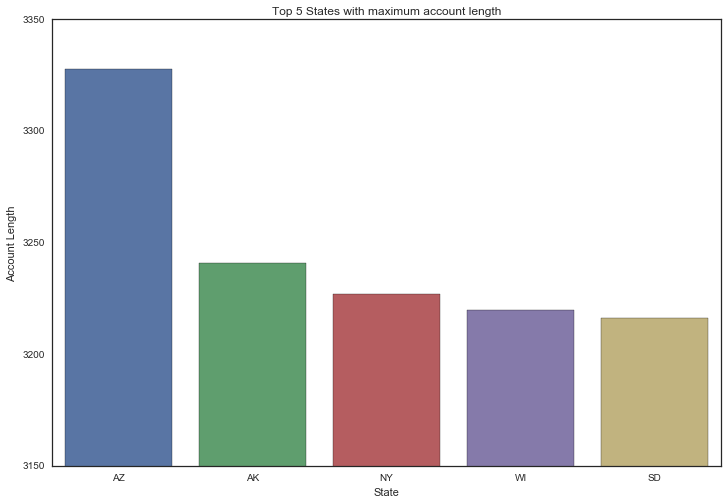

In [130]:
plt.figure(figsize=[12,8])
sns.set_style('white')
sns.barplot(x=state_length.index[0:5],y=state_length.values[0:5])
plt.ylabel('Account Length')
plt.title('Top 5 States with maximum account length')
plt.ylim((3150,3350));

In [11]:
# Convert the churn false and true to 0 and 1
data['Churn?'] = data['Churn?'].map({'True.': 1, 'False.': 0}) # Converting True = 1 and False = 0

In [12]:
data.head()

State  Account Length Int'l Plan VMail Plan  VMail Message  Day Mins  \
0    KS             128         no        yes             25     265.1   
1    OH             107         no        yes             26     161.6   
2    NJ             137         no         no              0     243.4   
3    OH              84        yes         no              0     299.4   
4    OK              75        yes         no              0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0        110       45.07     197.4         99       16.78       244.7   
1        123       27.47     195.5        103       16.62       254.4   
2        114       41.38     121.2        110       10.30       162.6   
3         71       50.90      61.9         88        5.26       196.9   
4        113       28.34     148.3        122       12.61       186.9   

   Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0           91         11.01       10.0           3         2.70   
1          103         11.45       13.7           3         3.70   
2          104          7.32       12.2           5         3.29   
3           89          8.86        6.6           7         1.78   
4          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1       0  
1               1       0  
2               0       0  
3               2       0  
4               3       0

In [13]:
# Do some EDA (Exploratory data analysis)
# Churn count for every state
state_churn_count = data.groupby(['State','Churn?'])['Churn?'].count()

In [14]:
state_churn_count = state_churn_count.unstack(level=1)

/Users/Sujay/anaconda/lib/python2.7/site-packages/pandas/core/index.py:3293: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


In [15]:
state_churn_count[0:5]

Churn?   0   1
State         
AK      49   3
AL      72   8
AR      44  11
AZ      60   4
CA      25   9

In [16]:
# States with highest churn
top5_states_churn = state_churn_count.sort_index(by=1, ascending = False)[0:5]

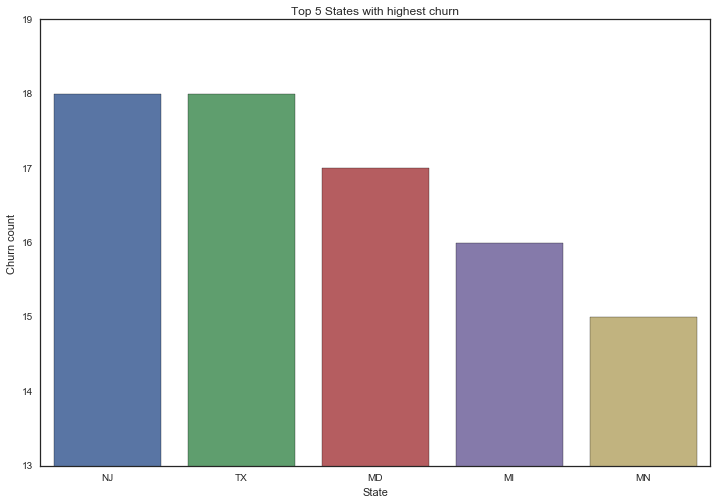

In [129]:
# Plotting the top 5 states with churn
plt.figure(figsize=[12,8])
sns.set_style('white')
sns.barplot(x=top5_states_churn.index, y=top5_states_churn.values[:,1])
plt.ylabel('Churn count')
plt.title('Top 5 States with highest churn')
plt.ylim((13,19));

In [18]:
newdata = data.drop(['State'], axis = 1)

In [19]:
newdata.head()

Account Length Int'l Plan VMail Plan  VMail Message  Day Mins  Day Calls  \
0             128         no        yes             25     265.1        110   
1             107         no        yes             26     161.6        123   
2             137         no         no              0     243.4        114   
3              84        yes         no              0     299.4         71   
4              75        yes         no              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0         11.01       10.0           3         2.70               1       0  
1         11.45       13.7           3         3.70               1       0  
2          7.32       12.2           5         3.29               0       0  
3          8.86        6.6           7         1.78               2       0  
4          8.41       10.1           3         2.73               3       0

In [20]:
# Check for skewness in the data

val_counts_churn = newdata['Churn?'].value_counts()
val_counts_churn

0    2850
1     483
dtype: int64

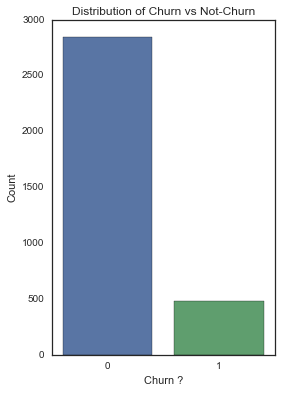

In [128]:
sns.set_style('white')
plt.figure(figsize=[4,6])
plt.xlabel('Churn ?')
plt.ylabel('Count')
plt.title('Distribution of Churn vs Not-Churn')
sns.barplot(x=val_counts_churn.index, y=val_counts_churn.values, palette="deep");

In [22]:
# Convert the Int'l Plan [yes and no to 1 and 0]
newdata["Int'l Plan"] = newdata["Int'l Plan"].map({'yes': 1, 'no': 0}) # Converting yes = 1 and no = 0

In [23]:
# Convert the Vmail Plan [yes and no to 1 and 0]
newdata["VMail Plan"] = newdata["VMail Plan"].map({'yes': 1, 'no': 0}) # Converting yes = 1 and no = 0

In [24]:
input_data = newdata.drop(['Churn?'],axis =1)

## Checking for multi-collinearity

In [25]:
# Check for multi-collinearity
corr = np.corrcoef(input_data, rowvar=0)  # correlation matrix
w, v = np.linalg.eig(corr)        # eigen values & eigen vectors
np.round(w,decimals =2)

array([ 1.92,  2.05,  2.04,  1.98,  2.  ,  0.04,  1.07,  1.03,  0.95,
        1.01,  0.96,  0.98,  0.98,  0.  ,  0.  ,  0.  ,  0.  ])

In [26]:
colnames = input_data.columns.values

In [27]:
colnames

array(['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'], dtype=object)

We are checking if the eigen vectors corresponding to the eigen value close to 0 is non-zero. If it is then the

Variables are correlated. For example: for eigen vector corresponding to CustServ Calls - Day Mins and Day charge are related


In [28]:
for name,vector in zip(colnames,v[:,16]):
    print name, np.round(vector)

Account Length 0.0
Int'l Plan -0.0
VMail Plan -0.0
VMail Message 0.0
Day Mins -1.0
Day Calls -0.0
Day Charge 1.0
Eve Mins 0.0
Eve Calls -0.0
Eve Charge -0.0
Night Mins -0.0
Night Calls 0.0
Night Charge 0.0
Intl Mins -0.0
Intl Calls 0.0
Intl Charge 0.0
CustServ Calls 0.0


## Checking for outliers

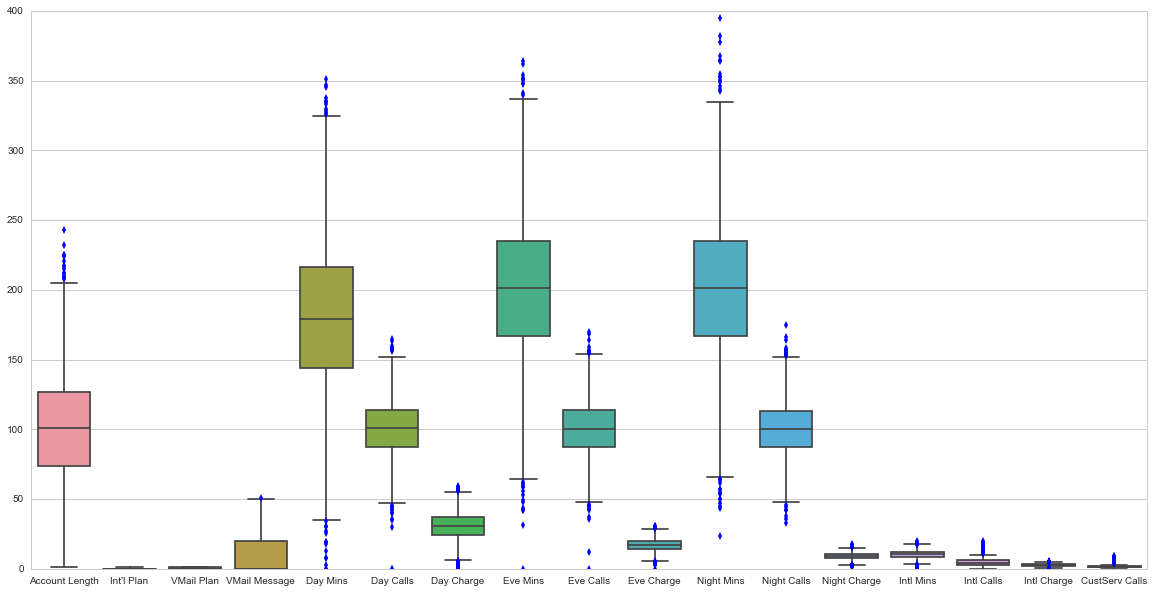

In [126]:
# Checking for outliers
sns.set_style('whitegrid')
plt.figure(figsize=[20,10])
sns.boxplot(input_data);

## Filtering out outliers

In [30]:
outliertest = newdata[newdata.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

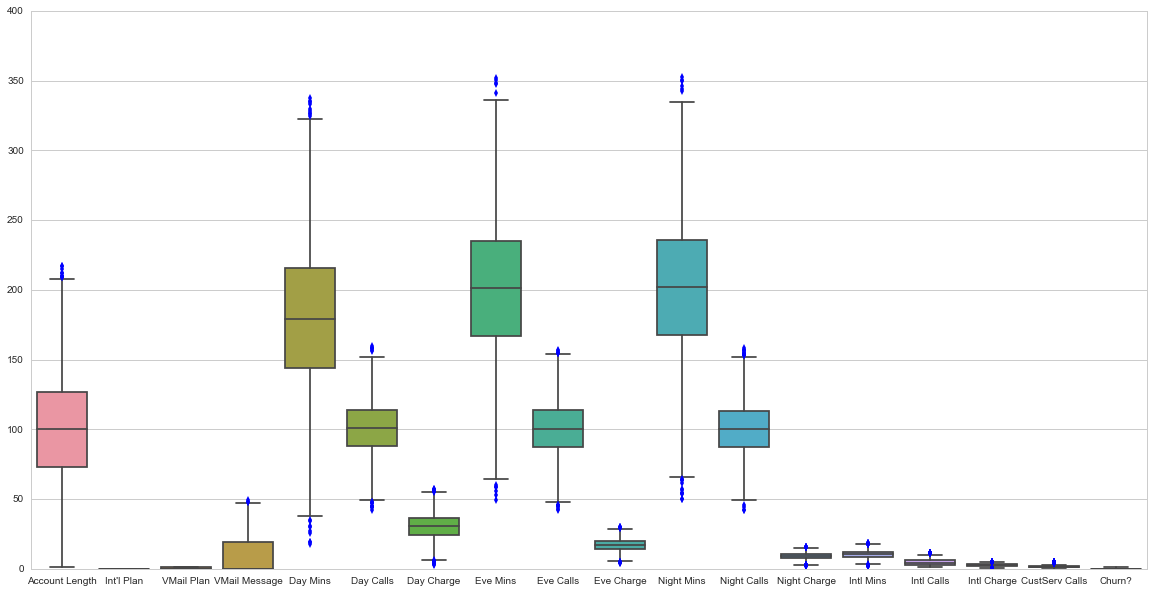

In [31]:
# Checking for outliers
sns.set_style('whitegrid')
plt.figure(figsize=[20,10])
sns.boxplot(outliertest);

In [32]:
outliertest = outliertest.reset_index()

In [33]:
outliertest = outliertest.drop(['index'], axis =1)

In [34]:
outliertest.tail()

Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  \
2855              79           0           0              0     134.7   
2856             192           0           1             36     156.2   
2857              68           0           0              0     231.1   
2858              28           0           0              0     180.8   
2859              74           0           1             25     234.4   

      Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
2855         98       22.90     189.7         68       16.12       221.4   
2856         77       26.55     215.5        126       18.32       279.1   
2857         57       39.29     153.4         55       13.04       191.3   
2858        109       30.74     288.8         58       24.55       191.9   
2859        113       39.85     265.9         82       22.60       241.4   

      Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
2855          128          9.96       11.8           5         3.19   
2856           83         12.56        9.9           6         2.67   
2857          123          8.61        9.6           4         2.59   
2858           91          8.64       14.1           6         3.81   
2859           77         10.86       13.7           4         3.70   

      CustServ Calls  Churn?  
2855               2       0  
2856               2       0  
2857               3       0  
2858               2       0  
2859               0       0

### Looking at the relationship between variables

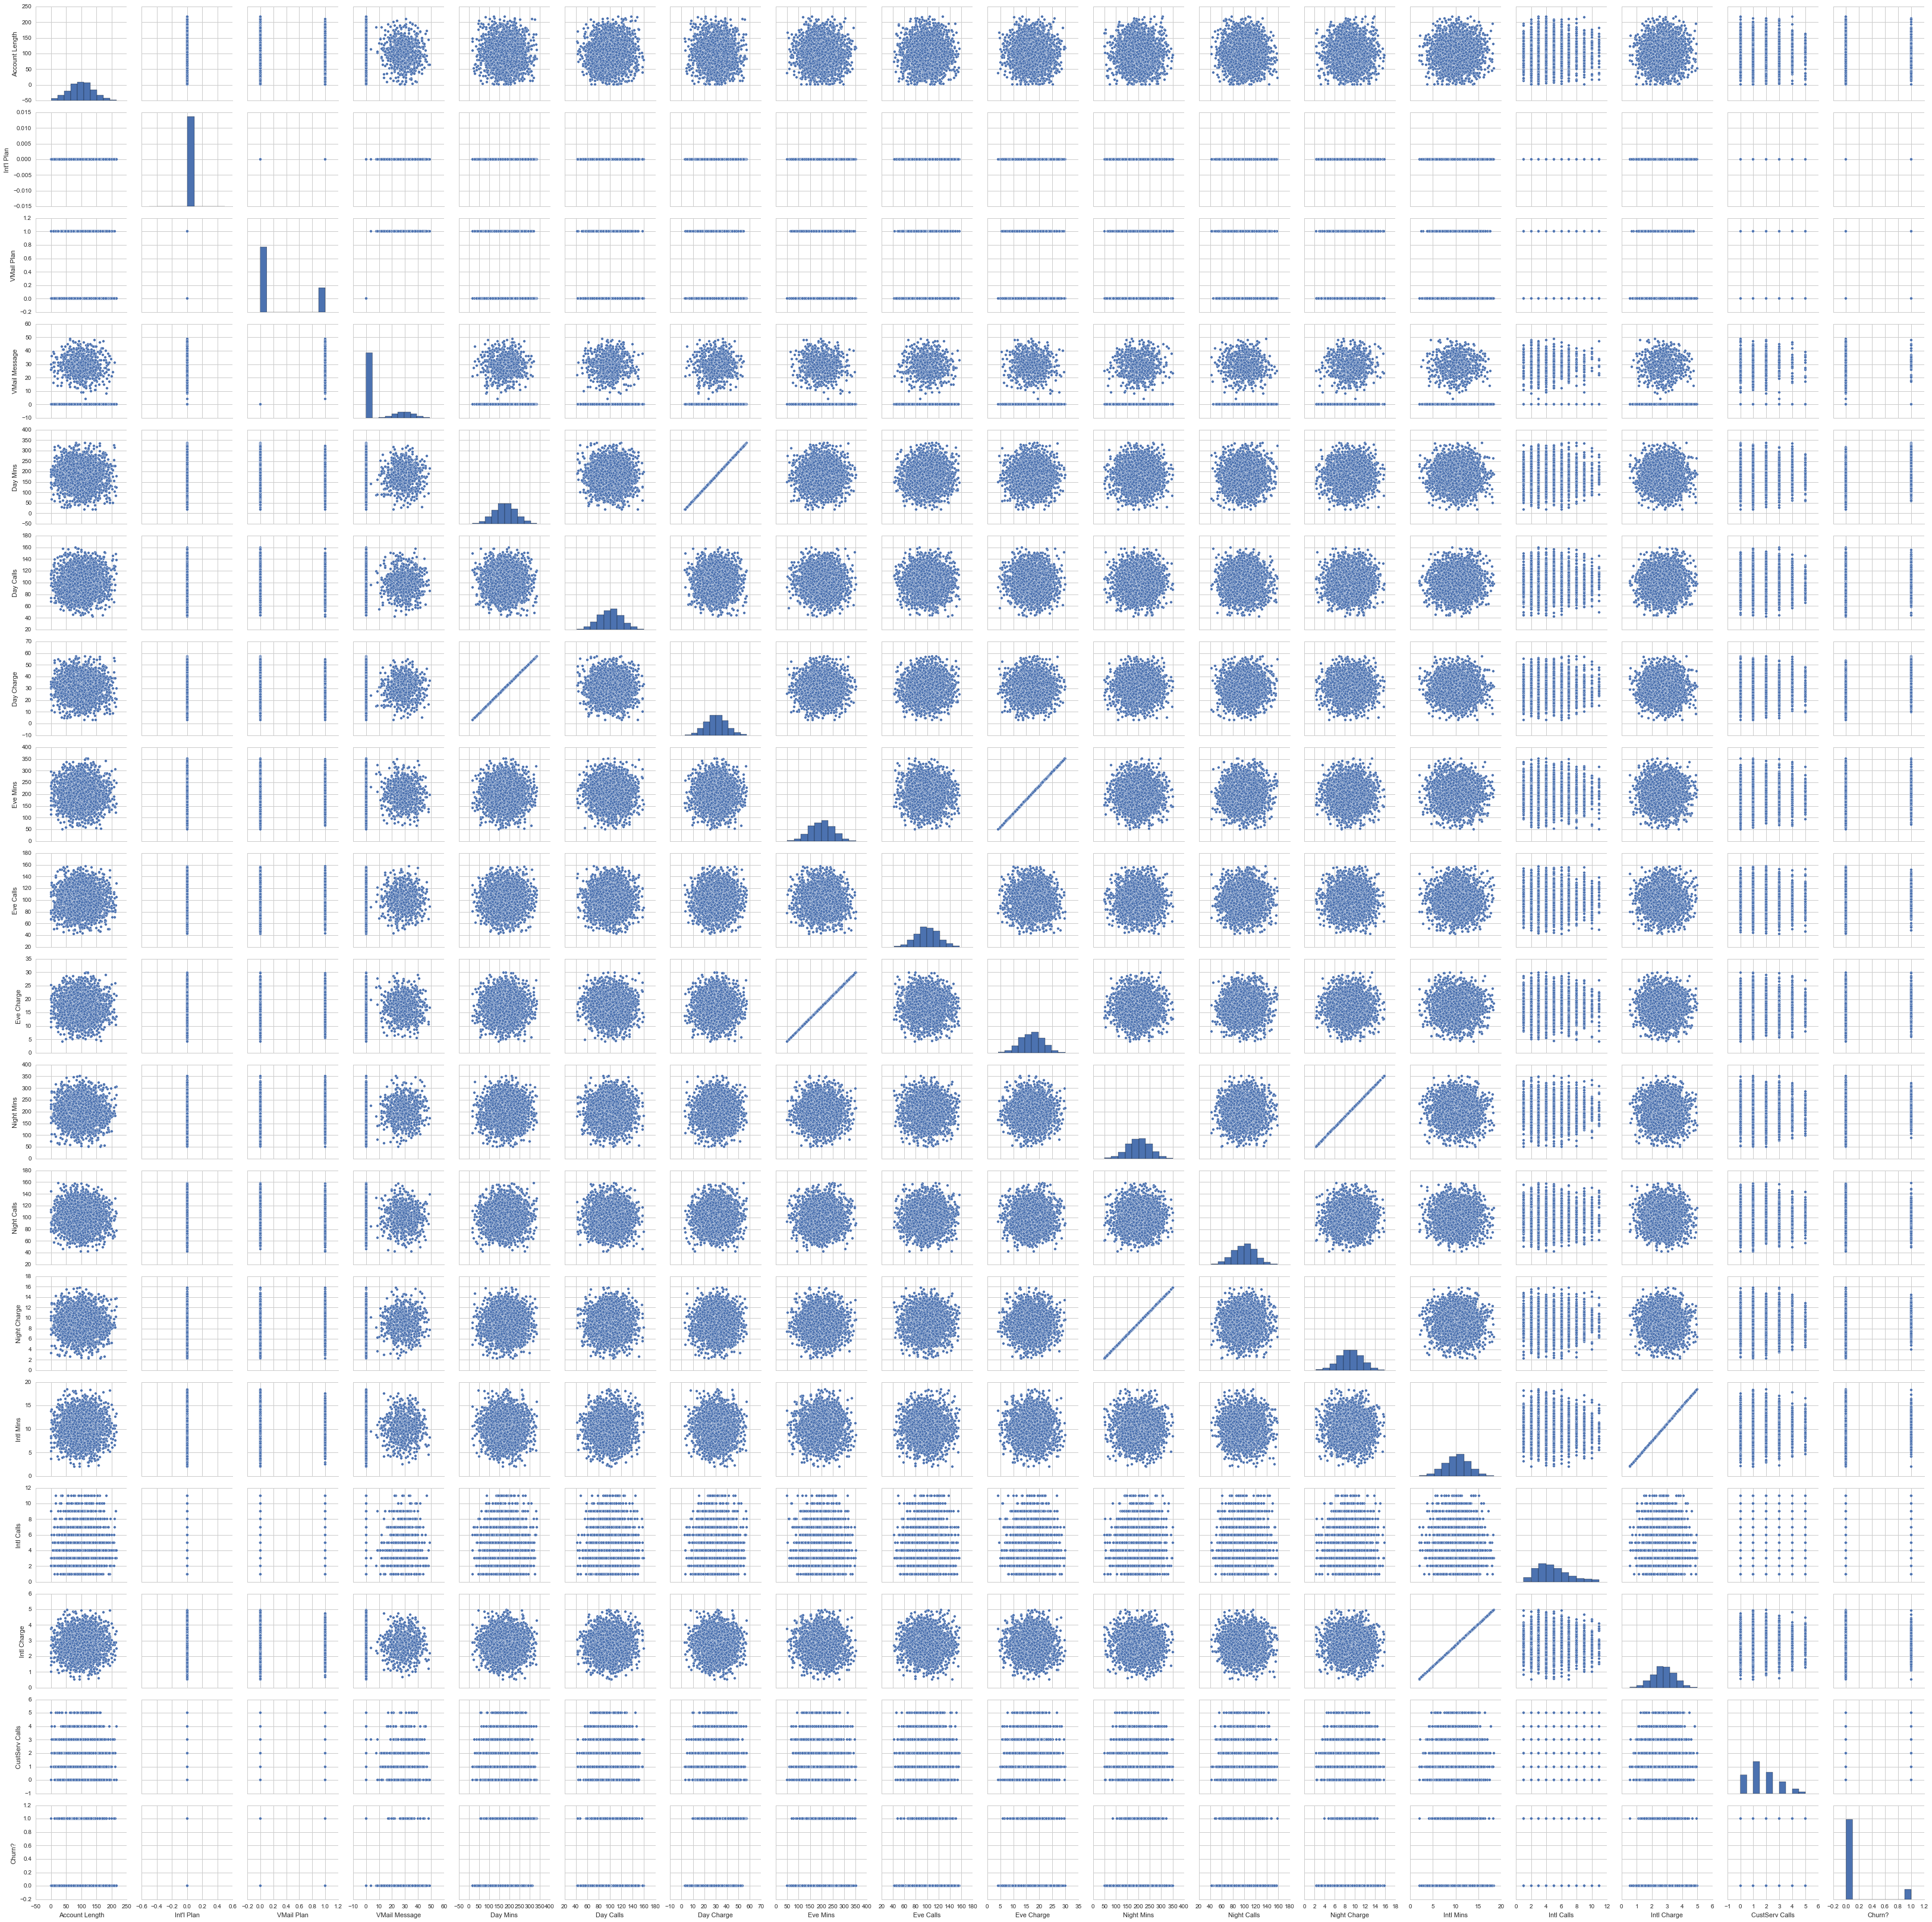

In [35]:
sns.pairplot(outliertest)

### Removing redundant data columns

In [36]:
prepared_data = outliertest.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1)

In [37]:
prepared_data.head()

Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0             128           0           1             25     265.1        110   
1             107           0           1             26     161.6        123   
2             137           0           0              0     243.4        114   
3             121           0           1             24     218.2         88   
4             117           0           0              0     184.5         97   

   Eve Mins  Eve Calls  Night Mins  Night Calls  Intl Mins  Intl Calls  \
0     197.4         99       244.7           91       10.0           3   
1     195.5        103       254.4          103       13.7           3   
2     121.2        110       162.6          104       12.2           5   
3     348.5        108       212.6          118        7.5           7   
4     351.6         80       215.8           90        8.7           4   

   CustServ Calls  Churn?  
0               1       0  
1               1       0  
2               0       0  
3               3       0  
4               1       0

In [38]:
prepared_data['Churn?'].value_counts()

0    2546
1     314
dtype: int64

## Preparing data for modeling

In [39]:
input_vars = prepared_data.drop(['Churn?'], axis=1)

In [40]:
# Get the independent variables
X = input_vars.values

In [41]:
# Get the dependent values
y = prepared_data['Churn?'].values

In [42]:
# Make the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27)

## Logistic Regression

In [43]:
# Logistic regression

# instantiate a logistic regression model, and fit with X and y
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Predict the result
model1_prediction = model1.predict(X_test)

# check the accuracy on the training set
model1.score(X_test, y_test)

0.88615782664941789

In [44]:
input_vars.columns

Index([u'Account Length', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Eve Mins', u'Eve Calls', u'Night Mins', u'Night Calls', u'Intl Mins', u'Intl Calls', u'CustServ Calls'], dtype='object')

In [45]:
np.round(model1.coef_,decimals=2)

array([[-0.  ,  0.  , -1.61,  0.02,  0.01,  0.  ,  0.01, -0.  ,  0.  ,
        -0.01, -0.03, -0.13,  0.58]])

#### Looking at the coefficients of the input variables we can see that CustServ Calls,VMail Plan and Intl Calls are not significant and can be droppped

In [46]:
filtered_input_vars = input_vars.drop(['VMail Plan', 'CustServ Calls', 'Intl Calls'], axis=1)

In [47]:
# Get the independent and dependent variables
X = filtered_input_vars.values
y = prepared_data['Churn?'].values

In [48]:
# Make the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [49]:
# Logistic regression

# instantiate a logistic regression model, and fit with X and y
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Predict the result
model2_prediction = model2.predict(X_test)

# check the accuracy on the training set
model2.score(X_test, y_test)

0.90909090909090906

In [50]:
np.round(model2.coef_,decimals=2)

array([[ 0.  ,  0.  , -0.05,  0.01,  0.  ,  0.01, -0.  ,  0.  , -0.01,
         0.01]])

In [51]:
confusion_matrix(y_test,model2_prediction)

array([[778,   0],
       [ 78,   2]])

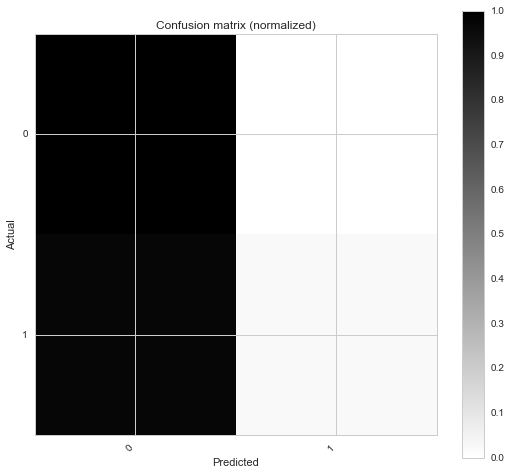

In [52]:
cm = ConfusionMatrix(y_test, model2_prediction)
cm.plot(normalized=True);

## Function to calculate cross validation scores

In [53]:
# Defining a function to calculate f1 scores and accuracy
def cross_validation_scores(X_train, X_test, y_train, y_test, model):
    '''
    INPUT: Train data and test data for X and y, Model name
    OUTPUT: Array(f1_scores), Array(accuracy_score)
    '''
    # Getting the best model
    i_model = model
    # Fitting the data
    i_model.fit(X_train,y_train)
    # Calculating f1 weighted scores
    f1_scores = cross_val_score(i_model,X_test,y_test,cv=20, scoring="f1_weighted")
    # Calculating accuracy
    acc_scores = cross_val_score(i_model,X_test,y_test,cv=20, scoring="accuracy")
    # Return f1 score and accuracy
    return f1_scores, acc_scores

In [79]:
# Save the cross validation scores returned from the function in a variable
cross_val_scores = cross_validation_scores(X_train, X_test, y_train, y_test, model2)

## Plot function for cross validation scores

In [55]:
# Plot the cross_val_scores
def plot_cv_scores(cv_scores, label):
    sns.set_style('white')
    plt.figure(figsize=(15,8))
    plt.plot(cv_scores[0])
    plt.plot(cv_scores[1])
    plt.xlim((0,16));
    plt.xlabel('cross-validation generator values')
    plt.ylabel('Score')
    plt.title('Cross Validation Scores for ' + str(label))
    plt.legend(["F1-Score","Accuracy"], loc='upper right')
    plt.show()

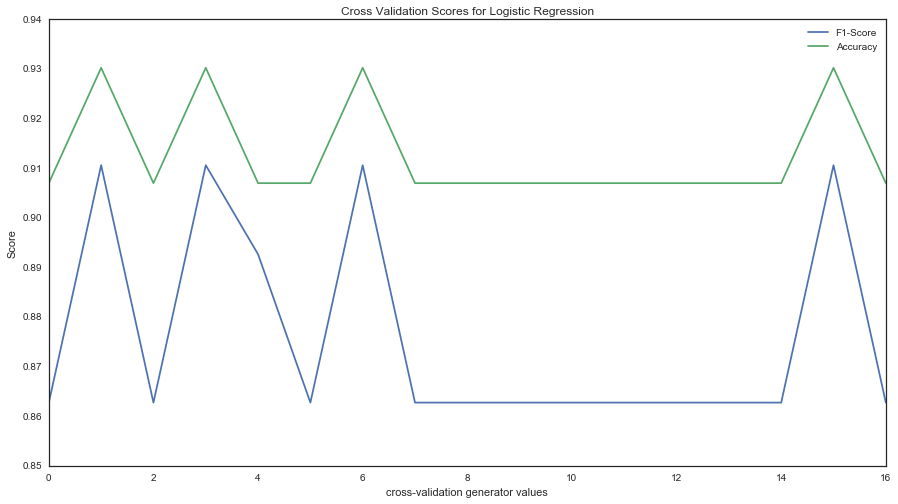

In [56]:
plot_cv_scores(cross_val_scores, "Logistic Regression")

## Linear SVM

In [57]:
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train) 

svc_pred_vals = clf.predict(X_test)

In [58]:
accuracy_svm = metrics.accuracy_score(y_test,svc_pred_vals)

## Looking at other classifiers

In [81]:
# Defining objects
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [82]:
# Fitting the data
rfc.fit(X_train, y_train) 
etc.fit(X_train, y_train) 
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
# Generating predicted values
rfc_pred_vals = rfc.predict(X_test)
etc_pred_vals = etc.predict(X_test)
abc_pred_vals = abc.predict(X_test)
gbc_pred_vals = gbc.predict(X_test)

In [84]:
# Finding out the accuracy
accuracy_rfc = metrics.accuracy_score(y_test,rfc_pred_vals)
accuracy_etc = metrics.accuracy_score(y_test,etc_pred_vals)
accuracy_abc = metrics.accuracy_score(y_test,abc_pred_vals)
accuracy_gbc = metrics.accuracy_score(y_test,gbc_pred_vals)

#### Preparing data for plotting

In [85]:
models = ["SVM","RandomForest Classifier","ExtraTrees Classifier","AdaBoost Classifier","Gradient Boosting Classifier"]

In [86]:
accuracy = [accuracy_svm,accuracy_rfc,accuracy_etc,accuracy_abc, accuracy_gbc]

In [87]:
sorted_models_accuracy = [model for acc, model in sorted(zip(accuracy, models), reverse=True)]

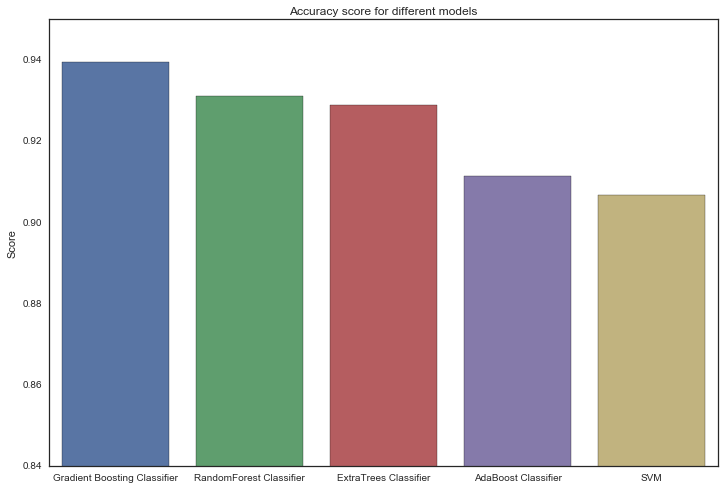

In [125]:
plt.figure(figsize=[12,8])
sns.barplot(x=sorted_models_accuracy, y=sorted(accuracy, reverse=True))
plt.ylabel('Score')
plt.title('Accuracy score for different models')
plt.ylim((0.84,0.95));

## Grid Search

In [67]:
# Defining the parameter grid
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1,3,4,5],
                      'min_samples_leaf': [1,3,4,5],
                      'bootstrap': [True, False],
                      'n_estimators': [30,40,50],
                      'random_state': [1]}

# Running gridsearch on the parameter grid
rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

# Fitting the train data prepared above
rf_gridsearch.fit(X_train, y_train)

# Printing the best parameters
print "best parameters:", rf_gridsearch.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  4.6min finished


best parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 40, 'min_samples_split': 1, 'random_state': 1, 'max_features': 'sqrt', 'max_depth': None}


In [68]:
# Printing the best model and the score
best_rf_model = rf_gridsearch.best_estimator_

In [69]:
# Fitting the data
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [70]:
# Predict the values
best_rf_predvals = best_rf_model.predict(X_test)

In [71]:
# Calculating scores
accuracy_best_rf = metrics.accuracy_score(y_test,best_rf_predvals)

In [72]:
# Print score
print accuracy_best_rf

0.941724941725


In [73]:
cm_best_model = ConfusionMatrix(y_test, best_rf_predvals)
cm_best_model

Predicted    0   1  __all__
Actual                     
0          773   5      778
1           45  35       80
__all__    818  40      858

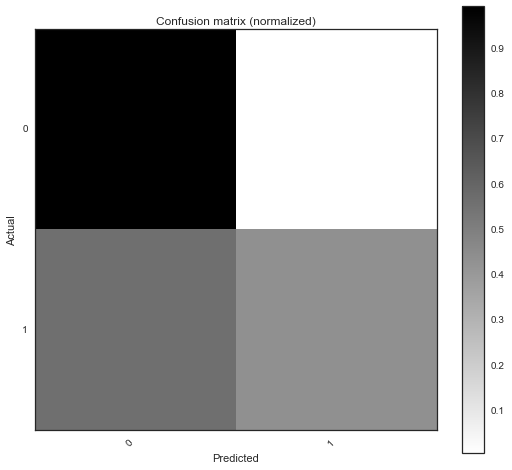

In [74]:
cm_best_model.plot(normalized=True);

## Gradient Boosting classifier

In [75]:
# Save the cross validation scores returned from the function in a variable
cross_val_scores_rf = cross_validation_scores(X_train, X_test, y_train, y_test, best_rf_model)

In [100]:
print np.mean(cross_val_scores_rf[1])

0.930011074197


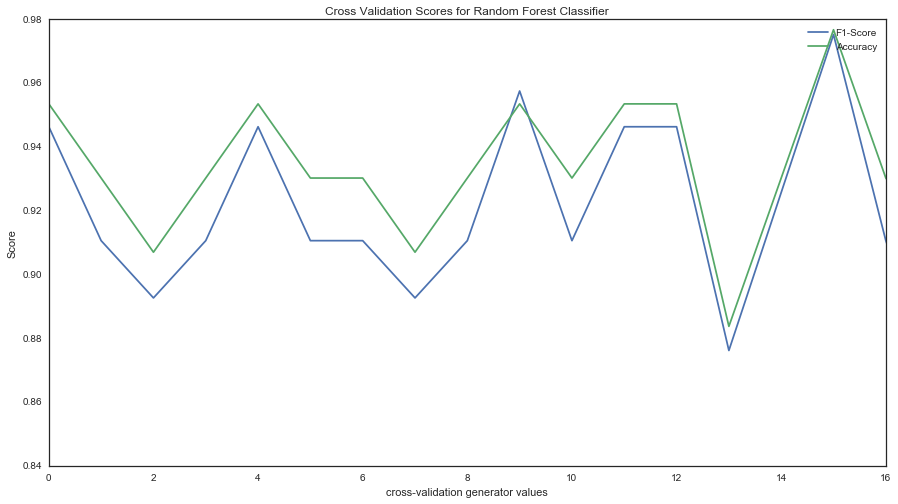

In [77]:
plot_cv_scores(cross_val_scores_rf, "Random Forest Classifier")

## Tuning Gradient Boosting Classifier

In [104]:
# Defining the parameter grid
gb_grid = {'max_depth': [3, None],
           'loss': ['deviance', 'exponential'],
           'max_features': ['sqrt', 'log2', None],
           'min_samples_split': [1,2,3,4],
           'min_samples_leaf': [1,2,3,4],
           'n_estimators': [10,40,70],
           'random_state': [1]}

# Running gridsearch on the parameter grid
gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gb_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

# Fitting the train data prepared above
gb_gridsearch.fit(X_train, y_train)

# Printing the best parameters
print "best parameters:", gb_gridsearch.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1372 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  6.6min finished


best parameters: {'loss': 'exponential', 'min_samples_leaf': 4, 'n_estimators': 70, 'max_features': None, 'random_state': 1, 'min_samples_split': 1, 'max_depth': None}


In [105]:
# Printing the best model and the score
best_gb_model = gb_gridsearch.best_estimator_

In [106]:
# Fitting the data
best_gb_model.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='exponential',
              max_depth=None, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=4, min_samples_split=1,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [107]:
# Predict the values
best_gb_predvals = best_gb_model.predict(X_test)

In [108]:
# Calculating scores
accuracy_best_gb = metrics.accuracy_score(y_test,best_gb_predvals)

In [109]:
accuracy_best_gb

0.94522144522144524

In [110]:
# Save the cross validation scores returned from the function in a variable
cross_val_scores_gb = cross_validation_scores(X_train, X_test, y_train, y_test, best_gb_model)

In [111]:
print np.mean(cross_val_scores_gb[1])

0.93349944629


In [131]:
cm_best_gb_model = ConfusionMatrix(y_test, best_gb_predvals)
cm_best_gb_model

Predicted    0   1  __all__
Actual                     
0          774   4      778
1           43  37       80
__all__    817  41      858

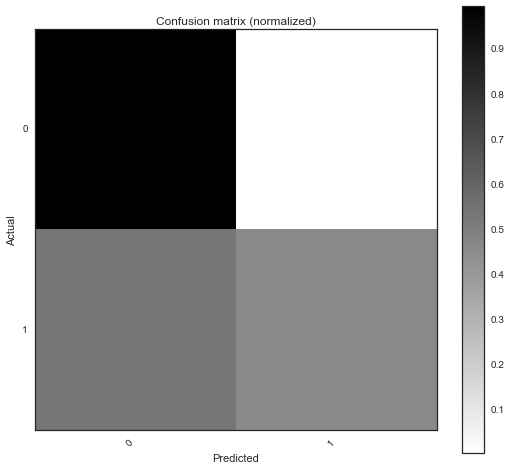

In [135]:
cm_best_gb_model.plot(normalized=True);

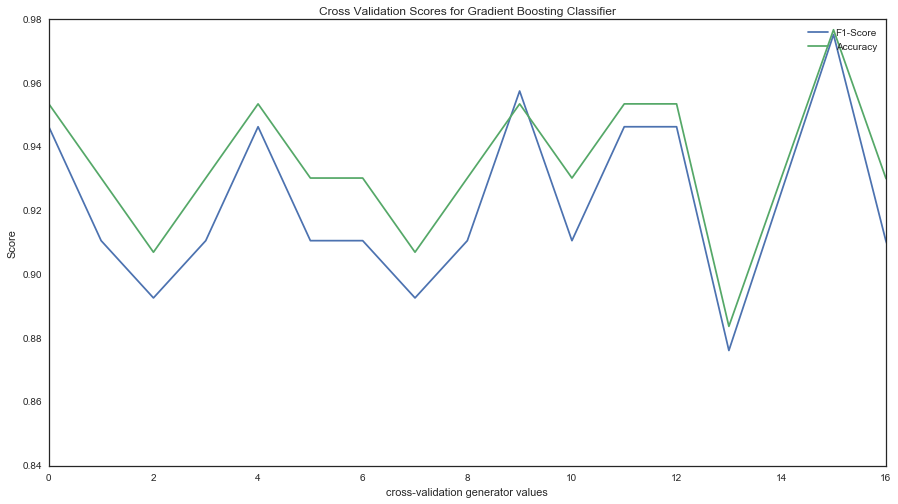

In [112]:
plot_cv_scores(cross_val_scores_rf, "Gradient Boosting Classifier")

## Comparing RF vs GB Classifiers

In [119]:
final_labels = ['Random Forest Classifier', 'Gradient Boosting Classifier']
final_scores = [np.mean(cross_val_scores_gb[0]), np.mean(cross_val_scores_rf[0])]

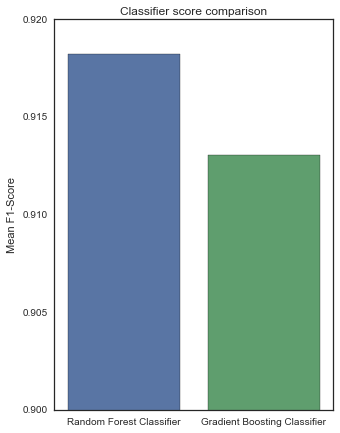

In [124]:
plt.figure(figsize=[5,7])
sns.barplot(x=final_labels,y=final_scores)
plt.ylabel('Mean F1-Score')
plt.title('Classifier score comparison')
plt.ylim((0.90,0.92));
